In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result1 = np.zeros((310,900))
i = 0

In [3]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[271:365,500:1400]
        latt = latt[271:365,500:1400]
        plot1 = plotvar[10:11,271:365,500:1400]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
        result1[i,:] = aveplot[:]
        i = i + 1

In [4]:
#np.savetxt('21-121.out',result1)

In [5]:
A = np.arange(310)
B = np.arange(900)
xx, yy = np.meshgrid(B, A)

In [6]:
nice_cmap=sns.diverging_palette(245, 15, n=30,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,50,60,70,100,110,130,140,150,160,170,180,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'20'}
#nice_levels = [34.65,34.655,34.66,34.662,34.665,34.667,34.67]
#nice_levels = [34.65,34.67,34.69,34.71,34.73,34.75,34.77,34.79,34.81]
#nice_levels = [34.30,34.35,34.4,34.45,34.5,34.55,34.6,34.65,34.7]
nice_levels = [34.10,34.18,34.20,34.22,34.24,34.26,34.28,34.30,34.32,34.34,34.36,34.38,34.40,34.42,\
               34.44,34.46,34.48,34.50,34.52,34.54,34.56,34.58]
#nice_levels = [34.64,34.642,34.644,34.646,34.648,34.65,34.652,34.654,34.656,34.658,34.66,34.662,34.664,34.666,34.668]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


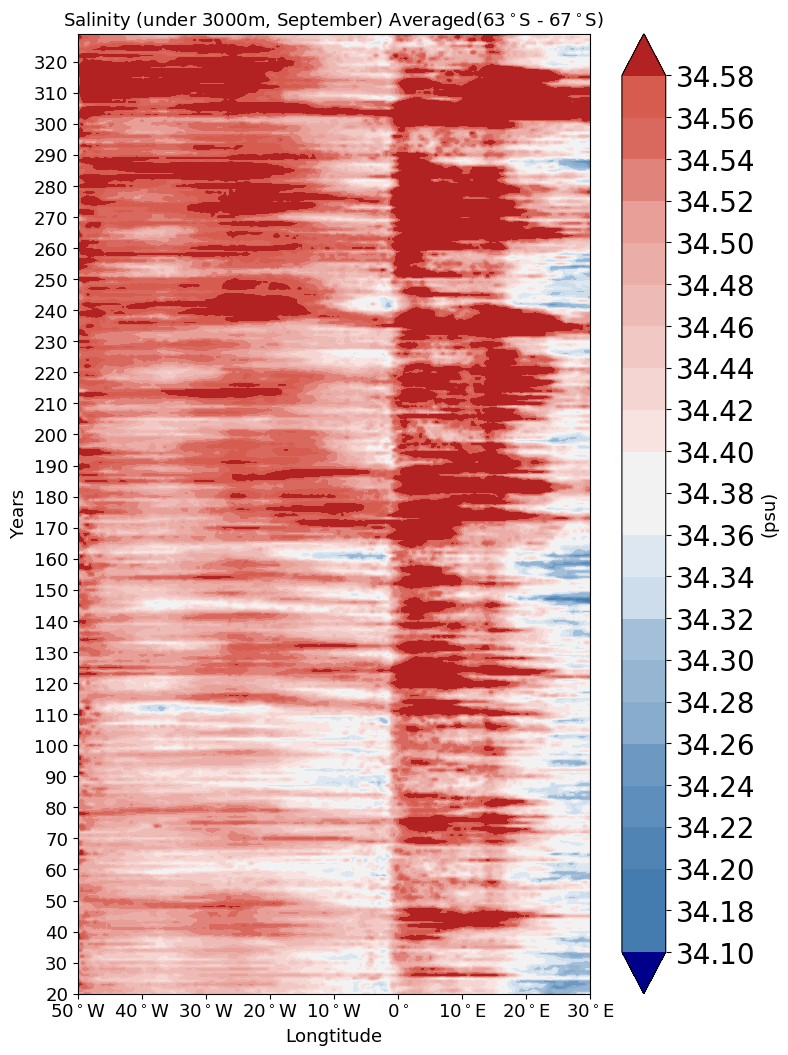

In [7]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'13'}
im = ax0.contourf(xx[:,100:], yy[:,100:], result1[:,100:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#plt.vlines(530, 0, 119, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(100,901,100), ['50$^\circ$W','40$^\circ$W','30$^\circ$W', '20$^\circ$W', '10$^\circ$W', '0$^\circ$'\
                             ,'10$^\circ$E','20$^\circ$E','30$^\circ$E'],**my_font)
plt.yticks(range(0,310,10), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Salinity (under 3000m, September) Averaged(63$^\circ$S - 67$^\circ$S)',**my_font)
plt.savefig("salttop200m.png",bbox_inches='tight',dpi=fig.dpi)

In [8]:
cc = result1.mean(axis=0)

In [9]:
result2 = result1 - cc

In [10]:
result2.min()

-0.2530068674395167

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


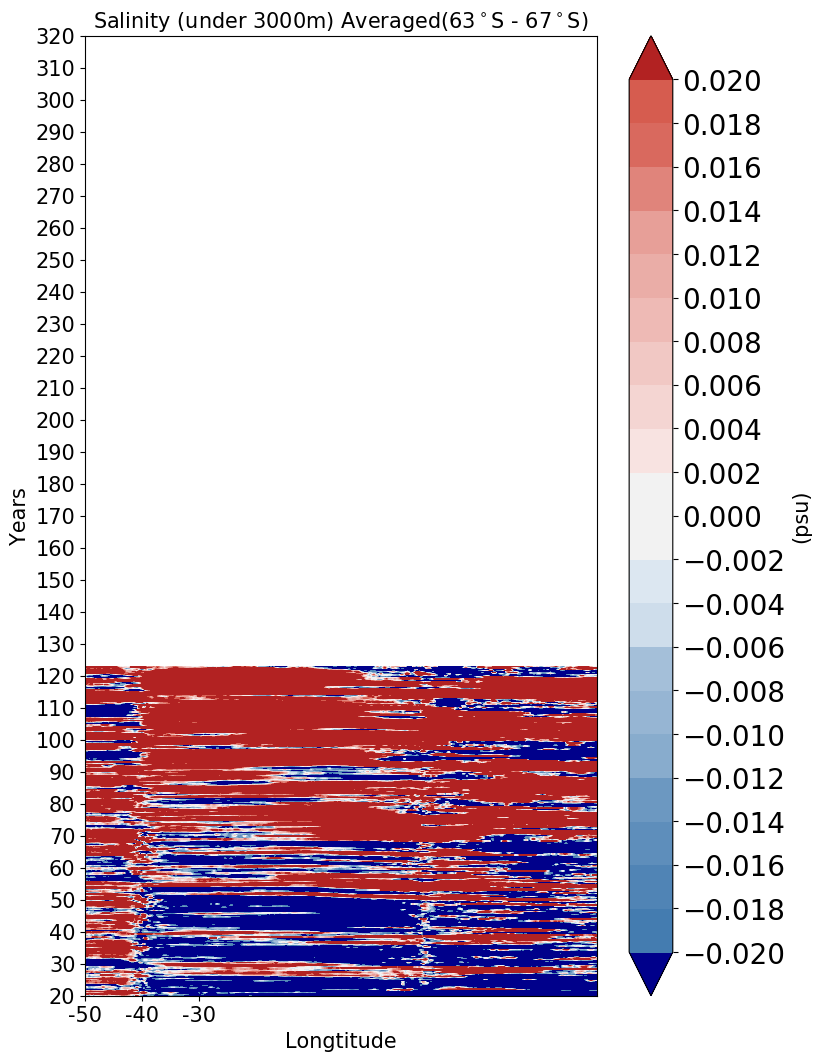

In [11]:
nice_levels = [-0.02,-0.018,-0.016,-0.014,-0.012,-0.01,-0.008,-0.006,-0.004,-0.002,0,0.002,0.004,0.006,0.008,\
               0.01,0.012,0.014,0.016,0.018,0.02]
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'15'}
im = ax0.contourf(xx, yy, result2,cmap = new_cmap,\
                  levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#plt.vlines(530, 0, 119, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,300,100), ['-50','-40','-30', '-20', '-10', '0'],**my_font)
plt.yticks(range(0,901,30), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Salinity (under 3000m) Averaged(63$^\circ$S - 67$^\circ$S)',**my_font)
plt.savefig("salt.png")